In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [ ]:

file_path = "/content/Crop_recommendation.csv"
data = pd.read_csv(file_path)


data.head()

print(data.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:

print("Missing values in each column:")
print(data.isnull().sum())

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Label Mapping: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (1760, 7)
Testing set size: (440, 7)


In [ ]:

rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)


rf_model.fit(X_train, y_train)


joblib.dump(rf_model, "crop_recommendation_model.pkl")
print("Model saved as 'crop_recommendation_model.pkl'")


Model saved as 'crop_recommendation_model.pkl'


In [ ]:

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

In [ ]:

def recommend_crop(nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall):

    input_data = pd.DataFrame({
        'N': [nitrogen],
        'P': [phosphorus],
        'K': [potassium],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [ph],
        'rainfall': [rainfall]
    })


    input_scaled = scaler.transform(input_data)


    predicted_label = rf_model.predict(input_scaled)[0]


    crop_name = label_encoder.inverse_transform([predicted_label])[0]
    return crop_name


In [ ]:

nitrogen = 90
phosphorus = 42
potassium = 43
temperature = 22.0
humidity = 80.0
ph = 6.5
rainfall = 200.0


recommended_crop = recommend_crop(nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall)
print(f"The recommended crop for the given conditions is: {recommended_crop}")


The recommended crop for the given conditions is: rice


Model Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

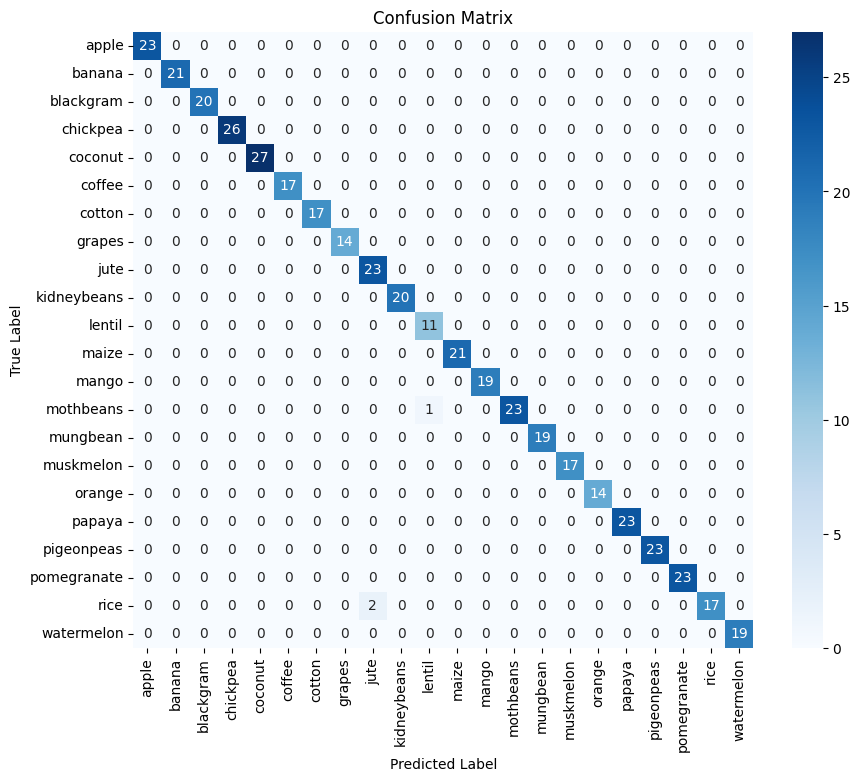

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:

print("Enter the soil and weather conditions to get a crop recommendation.")
nitrogen = float(input("Nitrogen (N): "))
phosphorus = float(input("Phosphorus (P): "))
potassium = float(input("Potassium (K): "))
temperature = float(input("Temperature (°C): "))
humidity = float(input("Humidity (%): "))
ph = float(input("pH: "))
rainfall = float(input("Rainfall (mm): "))


recommended_crop = recommend_crop(nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall)
print(f"The recommended crop is: {recommended_crop}")


Enter the soil and weather conditions to get a crop recommendation.
Nitrogen (N): 99
Phosphorus (P): 15
Potassium (K): 27
Temperature (°C): 27.0427
Humidity (%): 57.27
pH: 6.5011
Rainfall (mm): 165.68
The recommended crop is: coffee
